In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
def caminhada(N):
    passos1d = np.random.uniform(low = -0.5, high = 0.5, size = (N))
    passos2d = np.random.uniform(low = -0.5, high = 0.5, size = (N))
    return passos1d, passos2d

def somaAcumulada(N, passos):
    soma = []
    soma = soma + [passos[0]]
    for i in range(1, N):
        soma += [soma[-1] + passos[i]]
    return soma


# 1 - a

As duas funções a baixo está implementado as rotinas para gerar as caminhadas aleatorias
- grafico1a gera um caminhada aleatória 1d
- grafico2a gera um caminhada aleatória em 2 dimensões

In [4]:
def grafico1a(N):
    passos1, passos2 = caminhada(N)
    soma = somaAcumulada(N, passos1)
    t = np.arange(N)

    plt.plot(t, soma)
    plt.show()
N = 100000


In [5]:
def grafico1b(N):
    passos1, passos2 = caminhada(N)
    X = somaAcumulada(N, passos1)
    Y = somaAcumulada(N, passos2)
    distancia = (math.sqrt( (X[-1]-X[0])**2 + (Y[-1] - Y[0])**2 ))
    plt.axis('equal')
    plt.plot(X, Y)
    plt.show()

    return distancia


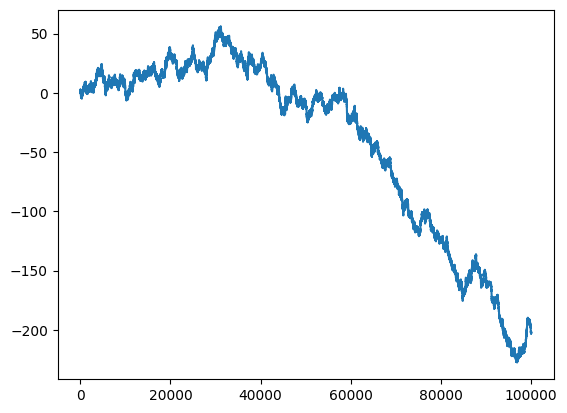

In [6]:
grafico1a(N)

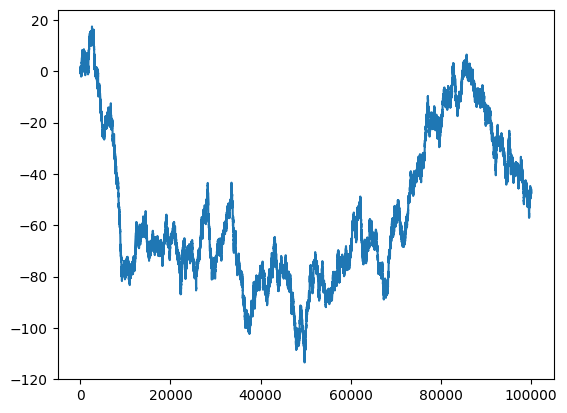

In [7]:
grafico1a(N)

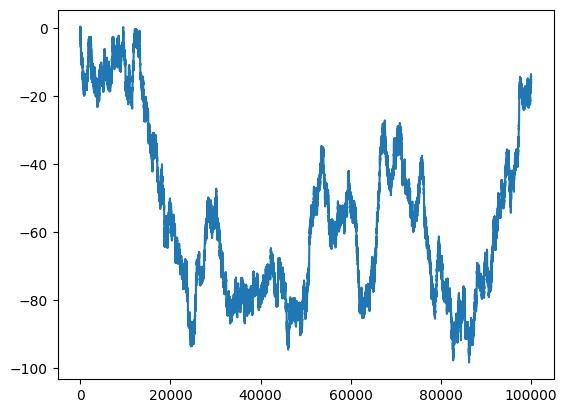

In [8]:
grafico1a(N)

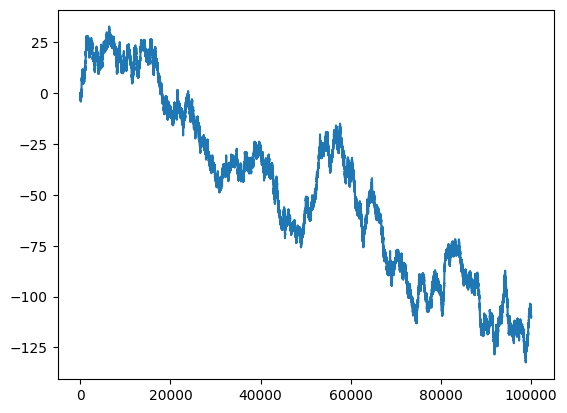

In [9]:
grafico1a(N)

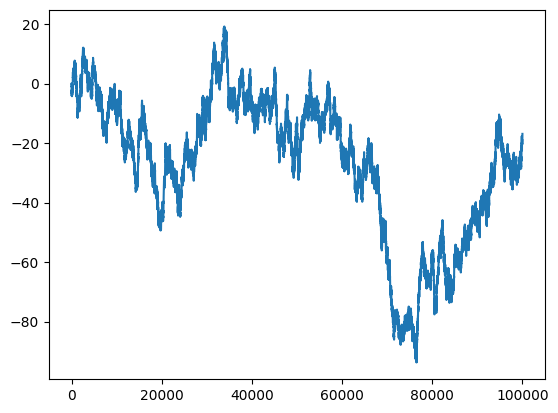

In [10]:
grafico1a(N)

# 1 - b

Em nossa experimentação percebemos que ao aumentar a número de passos em 100 vezes, nem sempre resultou em a distancia aumentar em dez vezes algumas vezes aumentou em 2, 8, 16 vezes, pórem rodando várias vezes conseguimos perceber que a tendencia do aumento é próxima de 10 vezes.

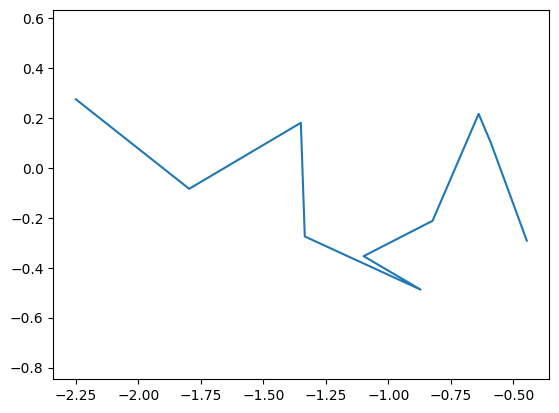

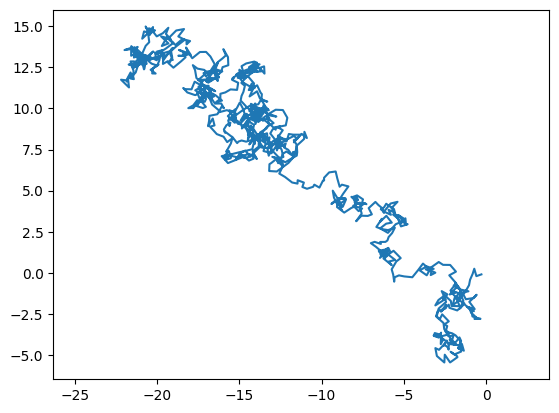

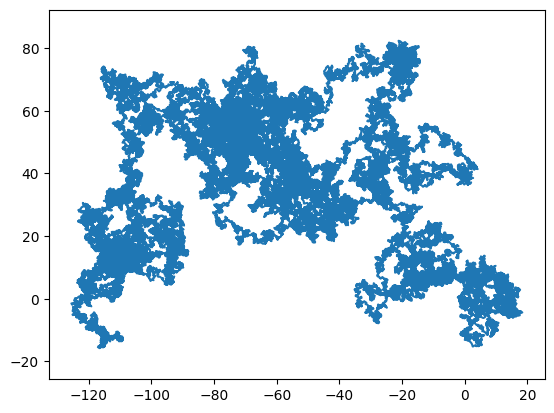

Aumento da distancia de 10 para 1000 e de 12.067952707708066x mais
Aumento da distancia de 1000 para 100000 e de 4.848329339423059x mais


In [11]:
dist10 = grafico1b(10)
dist1000 = grafico1b(1000)
dist100000 = grafico1b(100000)

print(f'Aumento da distancia de 10 para 1000 e de {dist1000/dist10}x mais')
print(f'Aumento da distancia de 1000 para 100000 e de {dist100000/dist1000}x mais')

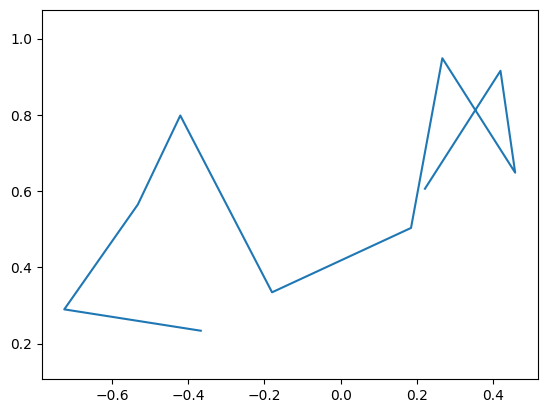

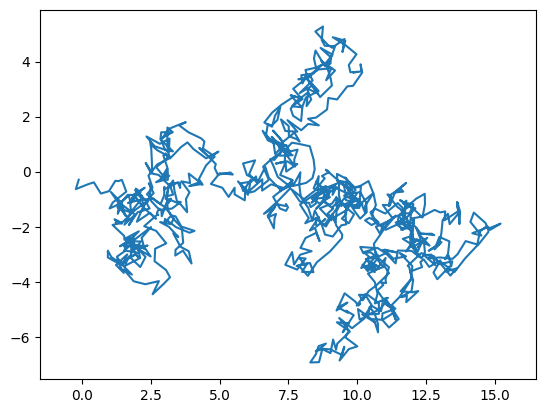

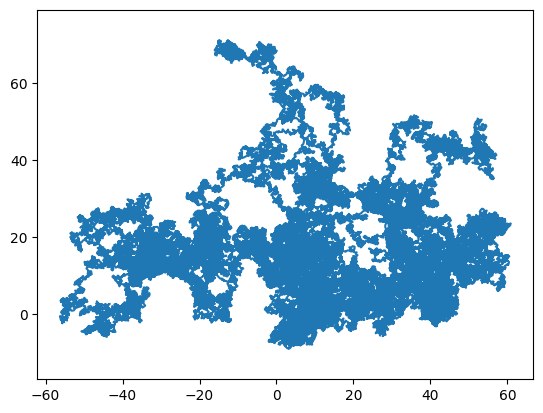

Aumento da distancia de 10 para 1000 e de 19.371259430976945x mais
Aumento da distancia de 1000 para 100000 e de 5.023334598468381x mais


In [12]:
dist10 = grafico1b(10)
dist1000 = grafico1b(1000)
dist100000 = grafico1b(100000)

print(f'Aumento da distancia de 10 para 1000 e de {dist1000/dist10}x mais')
print(f'Aumento da distancia de 1000 para 100000 e de {dist100000/dist1000}x mais')

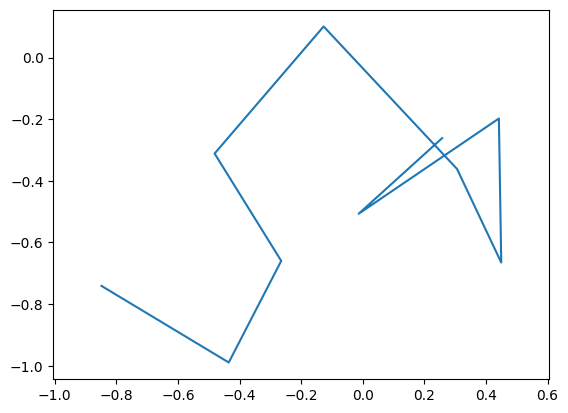

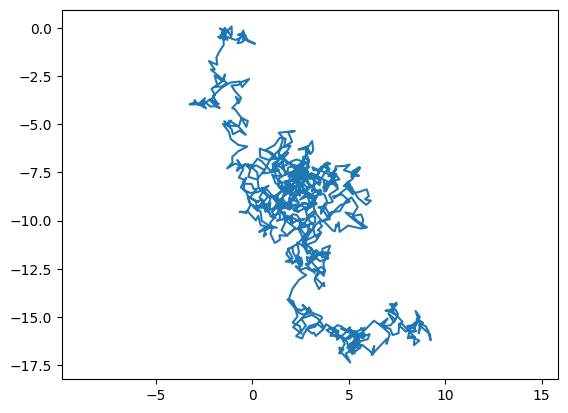

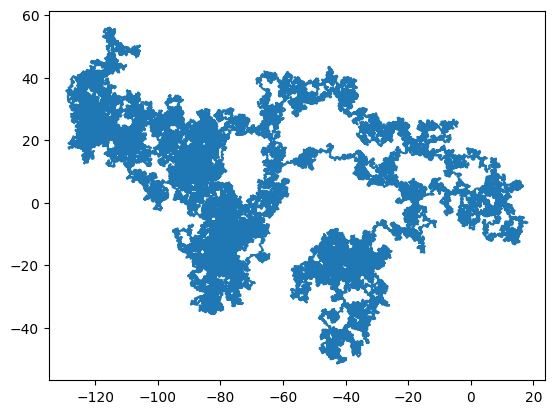

Aumento da distancia de 10 para 1000 e de 13.396273134817156x mais
Aumento da distancia de 1000 para 100000 e de 3.4505888629781625x mais


In [13]:
dist10 = grafico1b(10)
dist1000 = grafico1b(1000)
dist100000 = grafico1b(100000)

print(f'Aumento da distancia de 10 para 1000 e de {dist1000/dist10}x mais')
print(f'Aumento da distancia de 1000 para 100000 e de {dist100000/dist1000}x mais')

Consideramos que aumenta por *cerca* de 10x.

# 2

Analisando as dispensão da caminha aleatória dando 1 e 10 passos aleátorios. Fica visivel que quando somente um passo é dado o resultado que obtemos é uma distribuição quadrática. Enquando para 10 passos a dispersão para uma caminhada tem a propriedade de ser circular foi um resuldado interessante, pois é uma caracteristica que consideramos pouco intuitiva.

In [14]:
def coordenadaFinalDaCaminhada(N):
    passos1, passos2 = caminhada(N)
    X = somaAcumulada(N, passos1)
    Y = somaAcumulada(N, passos2)

    return X[-1], Y[-1]

def distribuicaoCoordenadasFinais(numCaminhadas, numPassosPorCaminhada):
    X = np.zeros(numCaminhadas)
    Y = np.zeros(numCaminhadas)

    for i in range(numCaminhadas):
        X[i], Y[i] = coordenadaFinalDaCaminhada(numPassosPorCaminhada)

    plt.axis('equal')
    plt.plot(X, Y)
    plt.show()

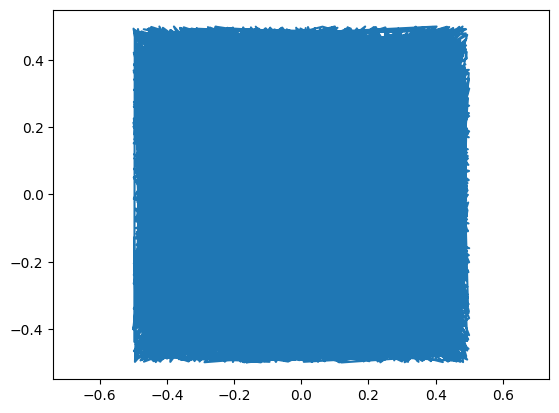

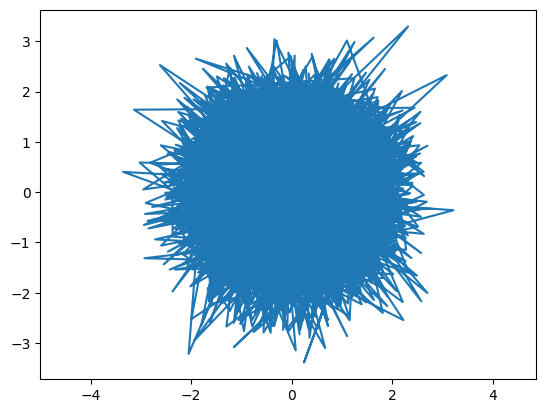

In [15]:
distribuicaoCoordenadasFinais(10_000, 1)
distribuicaoCoordenadasFinais(10_000, 10)

# c

Realizando as experimentações percebemos que para um número de passos maior ou igual a 3 a distribuição Gaussiana já se torna uma boa aproximação.
Enquanto para o numero de passos igual 1 observamos que a distribuição de probabilidades tende a ser uniforme

In [16]:
def coordenadaFinalDaCaminhada1d(N):
    passos1, passos2 = caminhada(N)
    X = somaAcumulada(N, passos1)
    return X[-1], (passos1 ** 2).sum()

def distribuicaoCoordenadasFinais1d(numCaminhadas, numPassosPorCaminhada):
    X = np.zeros(numCaminhadas)
    soma_quadrados_total = 0
    for i in range(numCaminhadas):
        X[i],soma_quadrados = coordenadaFinalDaCaminhada1d(numPassosPorCaminhada)
        soma_quadrados_total += soma_quadrados
    soma_quadrados_total = soma_quadrados_total/(numCaminhadas * numPassosPorCaminhada)
    soma_quadrados_total = math.sqrt(soma_quadrados_total)

    t = math.sqrt(numPassosPorCaminhada) * soma_quadrados_total
    gauss = []
    for x in np.arange(-3*t, 3*t, 0.01):
        gauss += [(1/math.sqrt(2*math.pi* t))* (math.e**(-((x**2)/(2*t**2))))]
    plt.plot(np.arange(-3*t, 3*t, 0.01), gauss)
    plt.show()
    plt.hist(X, 50, rwidth=0.8)
    plt.show()



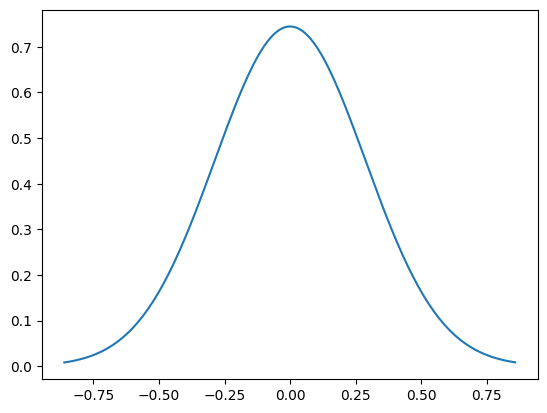

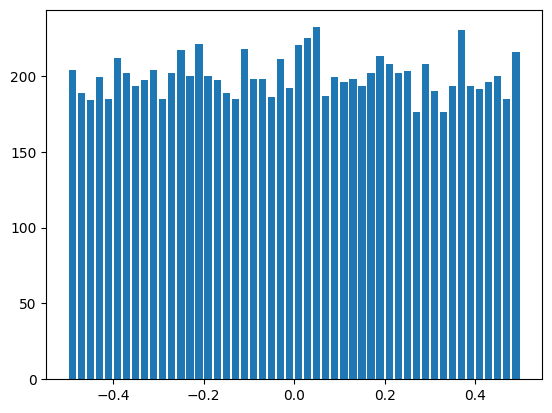

In [17]:
distribuicaoCoordenadasFinais1d(10_000, 1)


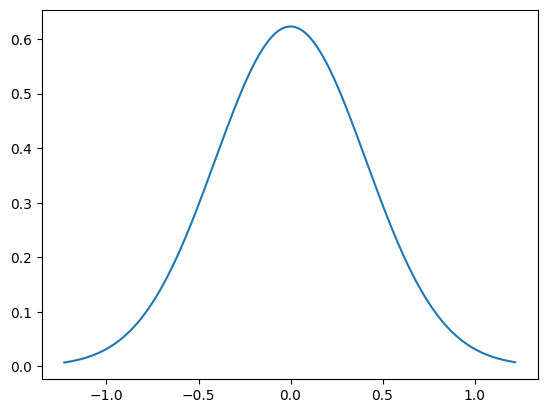

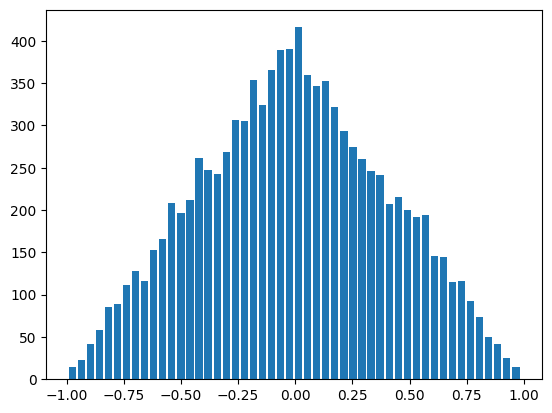

In [18]:
distribuicaoCoordenadasFinais1d(10_000, 2)


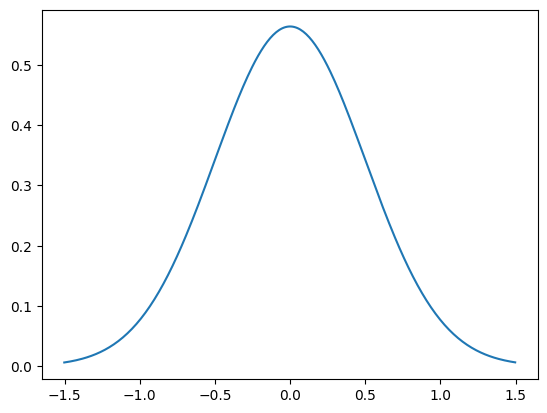

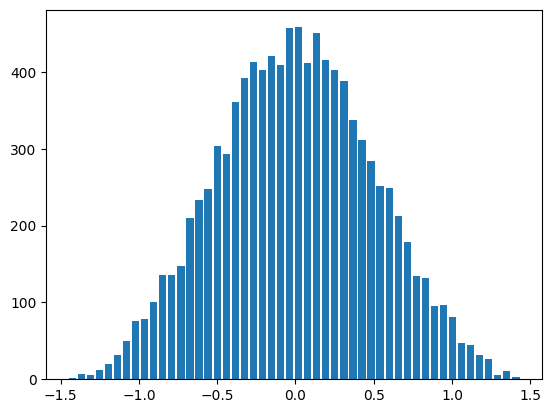

In [19]:
distribuicaoCoordenadasFinais1d(10_000, 3)


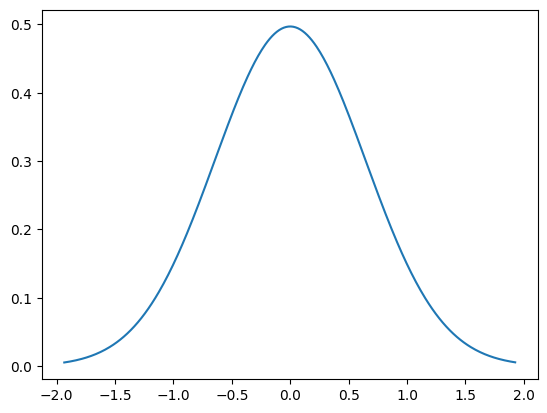

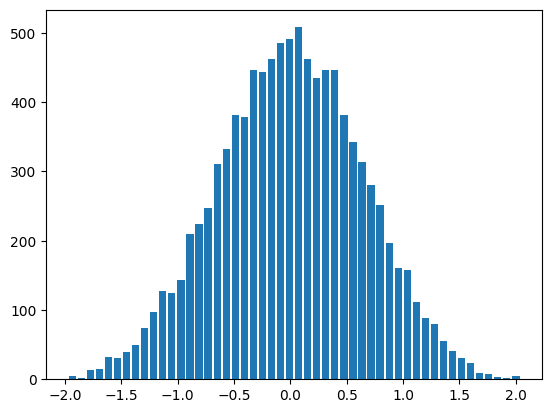

In [20]:
distribuicaoCoordenadasFinais1d(10_000, 5)


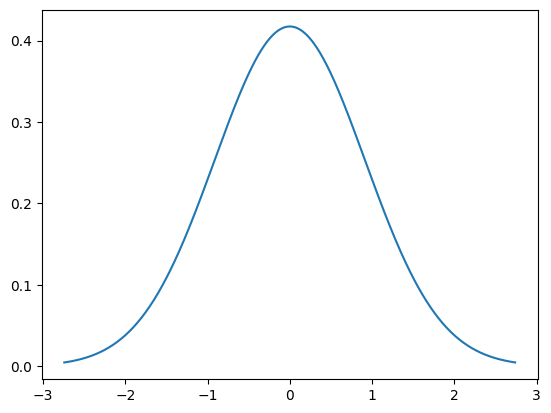

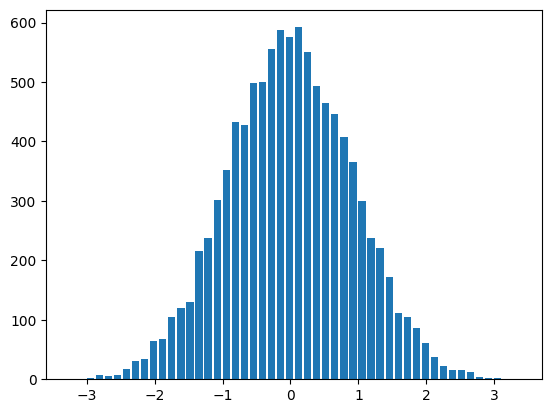

In [21]:
distribuicaoCoordenadasFinais1d(10_000, 10)
